# **LIBRARY**

In [1]:
# Install library untuk mengolah emoji
!pip install emoji

# Install library untuk stemming Bahasa Indonesia
!pip install Sastrawi

# Install library untuk deep learning (akan dipakai untuk LSTM)
!pip install tensorflow

# Install library machine learning (scikit-learn), untuk preprocessing & evaluasi
!pip install tensorflow scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.9 MB/s eta 0:00:00


In [2]:
# Import library untuk manipulasi data
import pandas as pd
import numpy as np

# Import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk pembersihan teks
import re
import string
import emoji
import nltk
from bs4 import BeautifulSoup
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Import library deep learning (TensorFlow + Keras)
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import LSTM, Dense, SimpleRNN, Embedding, Flatten, Dropout
from keras.activations import softmax
from tensorflow.keras.layers import GlobalMaxPooling1D, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Import library untuk evaluasi model dan split data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight

# Import untuk analisis frekuensi
from collections import Counter

# Download resource NLTK yang dibutuhkan
nltk.download('wordnet')
nltk.download('punkt')

# Nonaktifkan warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Import modul untuk mengakses Google Drive dari Colab
from google.colab import drive

# Mount (hubungkan) Google Drive ke folder '/content/drive'
# Agar bisa membaca/menyimpan file langsung di Drive
drive.mount('/content/drive')

Mounted at /content/drive


# **PREPROCESSING**

In [ ]:
# Membaca file CSV dari Google Drive ke DataFrame pandas
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/3/dataset.csv')

# Menampilkan 5 baris pertama DataFrame untuk cek data
df.head()

,full_text
0,Kalo bikinin sendiri bukan dari yang ditunjuk ...
1,MU losing streak ga ada yang peduli soalnya em...
2,iya jir aku juga abis fanday langsung timnas
3,Sebenernya Federasi dulu juga pakai vendor bua...
4,kyunchan24 Dan lbh bagus ini drpd punya timnas


In [ ]:
# Hitung jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()

# Tampilkan jumlah duplikat
print(f"Jumlah data duplikat: {jumlah_duplikat} baris")

# Hapus baris duplikat dan reset index
df = df.drop_duplicates().reset_index(drop=True)

# Tampilkan jumlah data setelah penghapusan duplikat
print(f"Jumlah data setelah hapus duplikat: {len(df)} baris")

Jumlah data duplikat: 33 baris
Jumlah data setelah hapus duplikat: 8170 baris


In [ ]:
# Hapus baris yang memiliki nilai kosong di kolom apa pun
df_cleaned = df.dropna()

# Cek kembali jumlah data setelah penghapusan
df_cleaned_info = df_cleaned.info()

df_cleaned_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8170 entries, 0 to 8169
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  8170 non-null   object
dtypes: object(1)
memory usage: 64.0+ KB


In [ ]:
def clean_tweet(text):
    text = re.sub(r'rt\s@\w+:', '', text)  # Hapus retweet tag "RT @username:"
    text = re.sub(r'@\w+', '', text)  # Hapus username mentions
    text = re.sub(r'#\w+', '', text)  # Hapus hashtags
    text = re.sub(r'http\S+', '', text)  # Hapus URL
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Hapus emoji dan karakter non-ASCII
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebihan
    return text

# Terapkan fungsi ke kolom full_text
df["clean_text"] = df["full_text"].apply(clean_tweet)

# Menampilkan hasil
df.head(10)

,full_text,clean_text
0,Kalo bikinin sendiri bukan dari yang ditunjuk ...,Kalo bikinin sendiri bukan dari yang ditunjuk ...
1,MU losing streak ga ada yang peduli soalnya em...,MU losing streak ga ada yang peduli soalnya em...
2,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas
3,Sebenernya Federasi dulu juga pakai vendor bua...,Sebenernya Federasi dulu juga pakai vendor bua...
4,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 Dan lbh bagus ini drpd punya timnas
5,idextratime bliblidotcom Saatnya apa teman2? A...,idextratime bliblidotcom Saatnya apa teman2 Am...
6,abimobilindo InfosuporterID Eleh baru ini aja ...,abimobilindo InfosuporterID Eleh baru ini aja ...
7,pendapat yang D U N G U dari seorang naturalis...,pendapat yang D U N G U dari seorang naturalis...
8,bisa ga si timnas bumi main tiap hari sumpah i...,bisa ga si timnas bumi main tiap hari sumpah i...
9,Salah satu yang buat Jepang jadi Raja Asia �,Salah satu yang buat Jepang jadi Raja Asia


In [ ]:
# Fungsi case folding
def case_folding(text):
    return text.lower()  # Ubah teks menjadi huruf kecil

# Terapkan case folding ke kolom full_text
df["lower_text"] = df["clean_text"].apply(case_folding)
df.head(10)

,full_text,clean_text,lower_text
0,Kalo bikinin sendiri bukan dari yang ditunjuk ...,Kalo bikinin sendiri bukan dari yang ditunjuk ...,kalo bikinin sendiri bukan dari yang ditunjuk ...
1,MU losing streak ga ada yang peduli soalnya em...,MU losing streak ga ada yang peduli soalnya em...,mu losing streak ga ada yang peduli soalnya em...
2,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas
3,Sebenernya Federasi dulu juga pakai vendor bua...,Sebenernya Federasi dulu juga pakai vendor bua...,sebenernya federasi dulu juga pakai vendor bua...
4,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 dan lbh bagus ini drpd punya timnas
5,idextratime bliblidotcom Saatnya apa teman2? A...,idextratime bliblidotcom Saatnya apa teman2 Am...,idextratime bliblidotcom saatnya apa teman2 am...
6,abimobilindo InfosuporterID Eleh baru ini aja ...,abimobilindo InfosuporterID Eleh baru ini aja ...,abimobilindo infosuporterid eleh baru ini aja ...
7,pendapat yang D U N G U dari seorang naturalis...,pendapat yang D U N G U dari seorang naturalis...,pendapat yang d u n g u dari seorang naturalis...
8,bisa ga si timnas bumi main tiap hari sumpah i...,bisa ga si timnas bumi main tiap hari sumpah i...,bisa ga si timnas bumi main tiap hari sumpah i...
9,Salah satu yang buat Jepang jadi Raja Asia �,Salah satu yang buat Jepang jadi Raja Asia,salah satu yang buat jepang jadi raja asia


In [ ]:
# Kamus kata slang dan singkatan ke bentuk baku
extended_normalization_dict = {
    'yg': 'yang', 'n': 'dan', 'bkn': 'bukan', 'dgn': 'dengan', 'dg': 'dengan', 'dr': 'dari',
    'aja': 'saja', 'gk': 'tidak', 'ga': 'tidak', 'tdk': 'tidak', 'g': 'tidak', 'nggak': 'tidak',
    'gak': 'tidak', 'kagak': 'tidak', 'kaga': 'tidak', 'abis': 'habis', 'sebenernya': 'sebenarnya',
    'krn': 'karena', 'sb': 'sebab', 'sbnr': 'sebenarnya', 'bnr': 'benar', 'bgt': 'banget',
    'kl': 'kalau', 'klo': 'kalau', 'kalo': 'kalau', 'jd': 'jadi', 'utk': 'untuk', 'unt': 'unit',
    'dlm': 'dalam', 'tp': 'tapi', 'trs': 'terus', 'trus': 'terus', 'udh': 'sudah', 'udah': 'sudah',
    'sdh': 'sudah', 'blm': 'belum', 'lg': 'lagi', 'sm': 'sama', 'ma': 'sama', 'pd': 'pada',
    'tmn': 'teman', 'teman2': 'teman-teman', 'an': 'akan', 'bbrp': 'beberapa', 'org': 'orang',
    'orng': 'orang', 'kmrn': 'kemarin', 'dmn': 'di mana', 'kpn': 'kapan', 'gmna': 'gimana',
    'bgmn': 'bagaimana', 'ok': 'oke', 'pls': 'tolong', 'btw': 'ngomong-ngomong', 'amp': 'dan',
    'cuma': 'hanya', 'emg': 'memang', 'emng': 'memang', 'gue': 'saya', 'gw': 'saya', 'gua': 'saya',
    'loe': 'kamu', 'lu': 'kamu', 'u': 'kamu', 'nih': 'ini', 'kek': 'kayak', 'jg': 'juga',
    'skrg': 'sekarang', 'uppppp': 'up', 'bikinin': 'bikin', 'lbh': 'lebih', 'd': 'di',
    'drpd': 'daripada', 'ayok': 'ayo', 'yuk': 'ayo', 'eleh': 'mengeluh', 'ats': 'atas',
    'sbg': 'sebagai', 'dpt': 'dapat', 'makasih': 'terima kasih', 'thx': 'terima kasih',
    'thanks': 'terima kasih', 'ntar': 'nanti', 'besok2': 'besok-besok', 'smg': 'semoga',
    'y': 'ya', 'bt': 'banget', 'gaes': 'teman-teman', 'temen': 'teman',
    'bolong2nya': 'bolong-bolongnya', 'bolong2': 'bolong-bolong'
}

# Fungsi untuk mengganti kata slang di teks dengan kata baku berdasarkan kamus
def normalize_text_with_extended_dict(text):
    words = text.lower().split()  # ubah ke lowercase dan pisah kata
    normalized_words = [extended_normalization_dict.get(word, word) for word in words]  # ganti kata
    return ' '.join(normalized_words)  # gabungkan kata kembali

# Terapkan normalisasi ke kolom teks dan simpan hasilnya ke kolom baru
df['normalized_text'] = df['lower_text'].apply(normalize_text_with_extended_dict)

# Tampilkan contoh hasil normalisasi
print(df[['lower_text', 'normalized_text']].head(10))

                                          lower_text  \
0  kalo bikinin sendiri bukan dari yang ditunjuk ...   
1  mu losing streak ga ada yang peduli soalnya em...   
2       iya jir aku juga abis fanday langsung timnas   
3  sebenernya federasi dulu juga pakai vendor bua...   
4     kyunchan24 dan lbh bagus ini drpd punya timnas   
5  idextratime bliblidotcom saatnya apa teman2 am...   
6  abimobilindo infosuporterid eleh baru ini aja ...   
7  pendapat yang d u n g u dari seorang naturalis...   
8  bisa ga si timnas bumi main tiap hari sumpah i...   
9         salah satu yang buat jepang jadi raja asia   

                                     normalized_text  
0  kalau bikin sendiri bukan dari yang ditunjuk f...  
1  mu losing streak tidak ada yang peduli soalnya...  
2      iya jir aku juga habis fanday langsung timnas  
3  sebenarnya federasi dulu juga pakai vendor bua...  
4  kyunchan24 dan lebih bagus ini daripada punya ...  
5  idextratime bliblidotcom saatnya apa teman-tem... 

In [ ]:
# Daftar stopword khusus
custom_words = [
    #–– kata dasar umum
    'aku','anda','adalah','atau','akan','bagi','bahwa','bila','begitu','bersama',
    'bisa','buat','bukan','dalam','dan','dengan','dari','di','dia','jika','juga',
    'jadi','karena','kami','kita','ke','lagi','lalu','maka','masih','mau',
    'memang','menjadi','mengapa','mereka','meskipun','mesti','mungkin','pada',
    'pasti','saat','saya','sangat','saja','seperti','semua','sejak','selalu',
    'sedang','setelah','sementara','sudah','supaya','tapi','tentu','tentang',
    'terhadap','terus','tiap','waktu','yang','yaitu','kamu',

    #–– gaul / seruan / filler
    'ya','nah','kan','dong','nih','gak','nggak','ga','aja','kok','doang','udah',
    'banget','emang','gitu','padahal','malah','loh','weh','cie','ciee','cieee',
    'ok','oke','yah','yahh','yahhh','plis','please','hadeh','hadeuh','ampun',

    #–– tawa & umpatan
    'hah','haha','hahaha','hehe','hehehe','hihi','hihihi','wkwk','wkwkwk','anjir',
    'anjrit','anjr','anj','njir','coy','cok','jir','bjir',

    #–– partikel kecil
    'pas','kah','sih','deh','oh','ih','lah','tuh','si','mu','pa','ata','jela'
]

# Hilangkan duplikat & jadikan set
stopwords_custom = set(custom_words)

# Fungsi untuk menghapus kata stopword dari teks
def remove_custom_stopwords(text: str) -> str:
    return ' '.join([w for w in text.split() if w not in stopwords_custom])

# Terapkan fungsi stopword removal pada kolom 'normalized_text', simpan ke kolom baru
df['stopwords_text'] = df['normalized_text'].apply(remove_custom_stopwords)

# Tampilkan contoh hasil setelah stopword removal
print(df[['normalized_text', 'stopwords_text']].head(10))

                                     normalized_text  \
0  kalau bikin sendiri bukan dari yang ditunjuk f...   
1  mu losing streak tidak ada yang peduli soalnya...   
2      iya jir aku juga habis fanday langsung timnas   
3  sebenarnya federasi dulu juga pakai vendor bua...   
4  kyunchan24 dan lebih bagus ini daripada punya ...   
5  idextratime bliblidotcom saatnya apa teman-tem...   
6  abimobilindo infosuporterid mengeluh baru ini ...   
7  pendapat yang di kamu dan tidak kamu dari seor...   
8  bisa tidak si timnas bumi main tiap hari sumpa...   
9         salah satu yang buat jepang jadi raja asia   

                                      stopwords_text  
0  kalau bikin sendiri ditunjuk federasi pabrikan...  
1  losing streak tidak ada peduli soalnya klub ka...  
2                   iya habis fanday langsung timnas  
3  sebenarnya federasi dulu pakai vendor ngerjain...  
4   kyunchan24 lebih bagus ini daripada punya timnas  
5  idextratime bliblidotcom saatnya apa teman-tem... 

In [ ]:
# Tokenisasi teks: pecah kalimat di kolom 'stopwords_text' jadi list kata
tokenized = df['stopwords_text'].apply(lambda x: x.split())

# Simpan hasil tokenisasi ke kolom baru 'tokenized_text'
df['tokenized_text'] = df['stopwords_text'].apply(lambda x: x.split())

# Tampilkan 10 baris pertama untuk melihat hasil tokenisasi
df.head(10)

,full_text,clean_text,lower_text,normalized_text,stopwords_text,tokenized_text
0,Kalo bikinin sendiri bukan dari yang ditunjuk ...,Kalo bikinin sendiri bukan dari yang ditunjuk ...,kalo bikinin sendiri bukan dari yang ditunjuk ...,kalau bikin sendiri bukan dari yang ditunjuk f...,kalau bikin sendiri ditunjuk federasi pabrikan...,"[kalau, bikin, sendiri, ditunjuk, federasi, pa..."
1,MU losing streak ga ada yang peduli soalnya em...,MU losing streak ga ada yang peduli soalnya em...,mu losing streak ga ada yang peduli soalnya em...,mu losing streak tidak ada yang peduli soalnya...,losing streak tidak ada peduli soalnya klub ka...,"[losing, streak, tidak, ada, peduli, soalnya, ..."
2,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga habis fanday langsung timnas,iya habis fanday langsung timnas,"[iya, habis, fanday, langsung, timnas]"
3,Sebenernya Federasi dulu juga pakai vendor bua...,Sebenernya Federasi dulu juga pakai vendor bua...,sebenernya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu pakai vendor ngerjain...,"[sebenarnya, federasi, dulu, pakai, vendor, ng..."
4,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 dan lbh bagus ini drpd punya timnas,kyunchan24 dan lebih bagus ini daripada punya ...,kyunchan24 lebih bagus ini daripada punya timnas,"[kyunchan24, lebih, bagus, ini, daripada, puny..."
5,idextratime bliblidotcom Saatnya apa teman2? A...,idextratime bliblidotcom Saatnya apa teman2 Am...,idextratime bliblidotcom saatnya apa teman2 am...,idextratime bliblidotcom saatnya apa teman-tem...,idextratime bliblidotcom saatnya apa teman-tem...,"[idextratime, bliblidotcom, saatnya, apa, tema..."
6,abimobilindo InfosuporterID Eleh baru ini aja ...,abimobilindo InfosuporterID Eleh baru ini aja ...,abimobilindo infosuporterid eleh baru ini aja ...,abimobilindo infosuporterid mengeluh baru ini ...,abimobilindo infosuporterid mengeluh baru ini ...,"[abimobilindo, infosuporterid, mengeluh, baru,..."
7,pendapat yang D U N G U dari seorang naturalis...,pendapat yang D U N G U dari seorang naturalis...,pendapat yang d u n g u dari seorang naturalis...,pendapat yang di kamu dan tidak kamu dari seor...,pendapat tidak seorang naturalisasi greg nwoko...,"[pendapat, tidak, seorang, naturalisasi, greg,..."
8,bisa ga si timnas bumi main tiap hari sumpah i...,bisa ga si timnas bumi main tiap hari sumpah i...,bisa ga si timnas bumi main tiap hari sumpah i...,bisa tidak si timnas bumi main tiap hari sumpa...,tidak timnas bumi main hari sumpah ini tim tid...,"[tidak, timnas, bumi, main, hari, sumpah, ini,..."
9,Salah satu yang buat Jepang jadi Raja Asia �,Salah satu yang buat Jepang jadi Raja Asia,salah satu yang buat jepang jadi raja asia,salah satu yang buat jepang jadi raja asia,salah satu jepang raja asia,"[salah, satu, jepang, raja, asia]"


In [ ]:
# Import stemmer dari pustaka Sastrawi untuk stemming bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Terapkan stemming pada setiap kata di kolom 'tokenized_text'
df['stemmed_text'] = df['tokenized_text'].apply(lambda x: [stemmer.stem(word) for word in x])

# Tampilkan 5 baris pertama hasil stemming
df.head(5)

,full_text,clean_text,lower_text,normalized_text,stopwords_text,tokenized_text,stemmed_text
0,Kalo bikinin sendiri bukan dari yang ditunjuk ...,Kalo bikinin sendiri bukan dari yang ditunjuk ...,kalo bikinin sendiri bukan dari yang ditunjuk ...,kalau bikin sendiri bukan dari yang ditunjuk f...,kalau bikin sendiri ditunjuk federasi pabrikan...,"[kalau, bikin, sendiri, ditunjuk, federasi, pa...","[kalau, bikin, sendiri, tunjuk, federasi, pabr..."
1,MU losing streak ga ada yang peduli soalnya em...,MU losing streak ga ada yang peduli soalnya em...,mu losing streak ga ada yang peduli soalnya em...,mu losing streak tidak ada yang peduli soalnya...,losing streak tidak ada peduli soalnya klub ka...,"[losing, streak, tidak, ada, peduli, soalnya, ...","[losing, streak, tidak, ada, peduli, soal, klu..."
2,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga habis fanday langsung timnas,iya habis fanday langsung timnas,"[iya, habis, fanday, langsung, timnas]","[iya, habis, fanday, langsung, timnas]"
3,Sebenernya Federasi dulu juga pakai vendor bua...,Sebenernya Federasi dulu juga pakai vendor bua...,sebenernya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu pakai vendor ngerjain...,"[sebenarnya, federasi, dulu, pakai, vendor, ng...","[benar, federasi, dulu, pakai, vendor, ngerjai..."
4,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 dan lbh bagus ini drpd punya timnas,kyunchan24 dan lebih bagus ini daripada punya ...,kyunchan24 lebih bagus ini daripada punya timnas,"[kyunchan24, lebih, bagus, ini, daripada, puny...","[kyunchan24, lebih, bagus, ini, daripada, puny..."


In [ ]:
df.to_csv('stemmed_dataset.csv', index=False)

# **LABELING**

In [ ]:
# Membaca file CSV hasil stemming dari Google Drive ke DataFrame
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/3/stemmed_dataset.csv')

# Menampilkan 10 baris pertama DataFrame untuk melihat isi data
df.head(10)

,full_text,clean_text,lower_text,normalized_text,stopwords_text,tokenized_text,stemmed_text
0,Kalo bikinin sendiri bukan dari yang ditunjuk ...,Kalo bikinin sendiri bukan dari yang ditunjuk ...,kalo bikinin sendiri bukan dari yang ditunjuk ...,kalau bikin sendiri bukan dari yang ditunjuk f...,kalau bikin sendiri ditunjuk federasi pabrikan...,"['kalau', 'bikin', 'sendiri', 'ditunjuk', 'fed...","['kalau', 'bikin', 'sendiri', 'tunjuk', 'feder..."
1,MU losing streak ga ada yang peduli soalnya em...,MU losing streak ga ada yang peduli soalnya em...,mu losing streak ga ada yang peduli soalnya em...,mu losing streak tidak ada yang peduli soalnya...,losing streak tidak ada peduli soalnya klub ka...,"['losing', 'streak', 'tidak', 'ada', 'peduli',...","['losing', 'streak', 'tidak', 'ada', 'peduli',..."
2,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga habis fanday langsung timnas,iya habis fanday langsung timnas,"['iya', 'habis', 'fanday', 'langsung', 'timnas']","['iya', 'habis', 'fanday', 'langsung', 'timnas']"
3,Sebenernya Federasi dulu juga pakai vendor bua...,Sebenernya Federasi dulu juga pakai vendor bua...,sebenernya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu pakai vendor ngerjain...,"['sebenarnya', 'federasi', 'dulu', 'pakai', 'v...","['benar', 'federasi', 'dulu', 'pakai', 'vendor..."
4,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 dan lbh bagus ini drpd punya timnas,kyunchan24 dan lebih bagus ini daripada punya ...,kyunchan24 lebih bagus ini daripada punya timnas,"['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","['kyunchan24', 'lebih', 'bagus', 'ini', 'darip..."
5,idextratime bliblidotcom Saatnya apa teman2? A...,idextratime bliblidotcom Saatnya apa teman2 Am...,idextratime bliblidotcom saatnya apa teman2 am...,idextratime bliblidotcom saatnya apa teman-tem...,idextratime bliblidotcom saatnya apa teman-tem...,"['idextratime', 'bliblidotcom', 'saatnya', 'ap...","['idextratime', 'bliblidotcom', 'saat', 'apa',..."
6,abimobilindo InfosuporterID Eleh baru ini aja ...,abimobilindo InfosuporterID Eleh baru ini aja ...,abimobilindo infosuporterid eleh baru ini aja ...,abimobilindo infosuporterid mengeluh baru ini ...,abimobilindo infosuporterid mengeluh baru ini ...,"['abimobilindo', 'infosuporterid', 'mengeluh',...","['abimobilindo', 'infosuporterid', 'keluh', 'b..."
7,pendapat yang D U N G U dari seorang naturalis...,pendapat yang D U N G U dari seorang naturalis...,pendapat yang d u n g u dari seorang naturalis...,pendapat yang di kamu dan tidak kamu dari seor...,pendapat tidak seorang naturalisasi greg nwoko...,"['pendapat', 'tidak', 'seorang', 'naturalisasi...","['dapat', 'tidak', 'orang', 'naturalisasi', 'g..."
8,bisa ga si timnas bumi main tiap hari sumpah i...,bisa ga si timnas bumi main tiap hari sumpah i...,bisa ga si timnas bumi main tiap hari sumpah i...,bisa tidak si timnas bumi main tiap hari sumpa...,tidak timnas bumi main hari sumpah ini tim tid...,"['tidak', 'timnas', 'bumi', 'main', 'hari', 's...","['tidak', 'timnas', 'bumi', 'main', 'hari', 's..."
9,Salah satu yang buat Jepang jadi Raja Asia �,Salah satu yang buat Jepang jadi Raja Asia,salah satu yang buat jepang jadi raja asia,salah satu yang buat jepang jadi raja asia,salah satu jepang raja asia,"['salah', 'satu', 'jepang', 'raja', 'asia']","['salah', 'satu', 'jepang', 'raja', 'asia']"


In [ ]:
# Salin isi kolom 'stemmed_text' ke kolom baru bernama 'text'
df['text'] = df['stemmed_text']

# Tampilkan 5 baris pertama untuk verifikasi
df.head()

,full_text,clean_text,lower_text,normalized_text,stopwords_text,tokenized_text,stemmed_text,text
0,Kalo bikinin sendiri bukan dari yang ditunjuk ...,Kalo bikinin sendiri bukan dari yang ditunjuk ...,kalo bikinin sendiri bukan dari yang ditunjuk ...,kalau bikin sendiri bukan dari yang ditunjuk f...,kalau bikin sendiri ditunjuk federasi pabrikan...,"['kalau', 'bikin', 'sendiri', 'ditunjuk', 'fed...","['kalau', 'bikin', 'sendiri', 'tunjuk', 'feder...","['kalau', 'bikin', 'sendiri', 'tunjuk', 'feder..."
1,MU losing streak ga ada yang peduli soalnya em...,MU losing streak ga ada yang peduli soalnya em...,mu losing streak ga ada yang peduli soalnya em...,mu losing streak tidak ada yang peduli soalnya...,losing streak tidak ada peduli soalnya klub ka...,"['losing', 'streak', 'tidak', 'ada', 'peduli',...","['losing', 'streak', 'tidak', 'ada', 'peduli',...","['losing', 'streak', 'tidak', 'ada', 'peduli',..."
2,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga habis fanday langsung timnas,iya habis fanday langsung timnas,"['iya', 'habis', 'fanday', 'langsung', 'timnas']","['iya', 'habis', 'fanday', 'langsung', 'timnas']","['iya', 'habis', 'fanday', 'langsung', 'timnas']"
3,Sebenernya Federasi dulu juga pakai vendor bua...,Sebenernya Federasi dulu juga pakai vendor bua...,sebenernya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu pakai vendor ngerjain...,"['sebenarnya', 'federasi', 'dulu', 'pakai', 'v...","['benar', 'federasi', 'dulu', 'pakai', 'vendor...","['benar', 'federasi', 'dulu', 'pakai', 'vendor..."
4,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 dan lbh bagus ini drpd punya timnas,kyunchan24 dan lebih bagus ini daripada punya ...,kyunchan24 lebih bagus ini daripada punya timnas,"['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","['kyunchan24', 'lebih', 'bagus', 'ini', 'darip..."


In [ ]:
for i, text in enumerate(df['text']):
    # Hapus karakter tanda kutip, koma, kurung siku dari string di baris i
    df['text'][i] = df['text'][i].replace("'", "").replace(',', '')\
                                 .replace(']', '').replace('[', '')

    list_words = []
    # Pisahkan string menjadi kata-kata dan simpan dalam list
    for word in df['text'][i].split():
        list_words.append(word)

    # Simpan kembali list kata-kata ke kolom 'text' di baris i
    df['text'][i] = list_words

# Tampilkan 5 baris pertama untuk cek hasil
df.head()

,full_text,clean_text,lower_text,normalized_text,stopwords_text,tokenized_text,stemmed_text,text
0,Kalo bikinin sendiri bukan dari yang ditunjuk ...,Kalo bikinin sendiri bukan dari yang ditunjuk ...,kalo bikinin sendiri bukan dari yang ditunjuk ...,kalau bikin sendiri bukan dari yang ditunjuk f...,kalau bikin sendiri ditunjuk federasi pabrikan...,"['kalau', 'bikin', 'sendiri', 'ditunjuk', 'fed...","['kalau', 'bikin', 'sendiri', 'tunjuk', 'feder...","[kalau, bikin, sendiri, tunjuk, federasi, pabr..."
1,MU losing streak ga ada yang peduli soalnya em...,MU losing streak ga ada yang peduli soalnya em...,mu losing streak ga ada yang peduli soalnya em...,mu losing streak tidak ada yang peduli soalnya...,losing streak tidak ada peduli soalnya klub ka...,"['losing', 'streak', 'tidak', 'ada', 'peduli',...","['losing', 'streak', 'tidak', 'ada', 'peduli',...","[losing, streak, tidak, ada, peduli, soal, klu..."
2,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga habis fanday langsung timnas,iya habis fanday langsung timnas,"['iya', 'habis', 'fanday', 'langsung', 'timnas']","['iya', 'habis', 'fanday', 'langsung', 'timnas']","[iya, habis, fanday, langsung, timnas]"
3,Sebenernya Federasi dulu juga pakai vendor bua...,Sebenernya Federasi dulu juga pakai vendor bua...,sebenernya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu pakai vendor ngerjain...,"['sebenarnya', 'federasi', 'dulu', 'pakai', 'v...","['benar', 'federasi', 'dulu', 'pakai', 'vendor...","[benar, federasi, dulu, pakai, vendor, ngerjai..."
4,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 dan lbh bagus ini drpd punya timnas,kyunchan24 dan lebih bagus ini daripada punya ...,kyunchan24 lebih bagus ini daripada punya timnas,"['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","[kyunchan24, lebih, bagus, ini, daripada, puny..."


In [ ]:
# Membuat kamus (dictionary) untuk lexicon kata positif
lexicon_positive = dict()

import csv
# Membaca file CSV lexicon positif, delimiter ';'
with open('/content/drive/MyDrive/SKRIPSI/3/lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])  # Simpan kata dan skor positif

# Membuat kamus (dictionary) untuk lexicon kata negatif
lexicon_negative = dict()

import csv
# Membaca file CSV lexicon negatif, delimiter ';'
with open('/content/drive/MyDrive/SKRIPSI/3/lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])  # Simpan kata dan skor negatif

# Fungsi analisis sentimen berbasis lexicon bahasa Indonesia
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    # Hitung skor positif berdasarkan kata dalam teks
    for word in text:
        if (word in lexicon_positive):
            score += lexicon_positive[word]
    # Hitung skor negatif berdasarkan kata dalam teks
    for word in text:
        if (word in lexicon_negative):
            score += lexicon_negative[word]

    # Tentukan polaritas berdasarkan skor total
    if (score >= 0):
        polarity = 'positif'
    else:
        polarity = 'negatif'
    return score, polarity

In [ ]:
# Terapkan fungsi analisis sentimen ke tiap baris teks, hasil berupa tuple (score, polarity)
results = df['text'].apply(sentiment_analysis_lexicon_indonesia)

# Pisahkan tuple hasil menjadi dua list (scores dan polarity)
results = list(zip(*results))

# Simpan skor polaritas ke kolom baru 'polarity_score'
df['polarity_score'] = results[0]

# Simpan label polaritas (positif/negatif) ke kolom baru 'polarity'
df['polarity'] = results[1]

# Tampilkan jumlah data untuk masing-masing kelas polaritas
print(df['polarity'].value_counts())

# Tampilkan 5 baris pertama dataframe untuk cek hasil
df.head()

polarity
negatif    5587
positif    2583
Name: count, dtype: int64


,full_text,clean_text,lower_text,normalized_text,stopwords_text,tokenized_text,stemmed_text,text,polarity_score,polarity
0,Kalo bikinin sendiri bukan dari yang ditunjuk ...,Kalo bikinin sendiri bukan dari yang ditunjuk ...,kalo bikinin sendiri bukan dari yang ditunjuk ...,kalau bikin sendiri bukan dari yang ditunjuk f...,kalau bikin sendiri ditunjuk federasi pabrikan...,"['kalau', 'bikin', 'sendiri', 'ditunjuk', 'fed...","['kalau', 'bikin', 'sendiri', 'tunjuk', 'feder...","[kalau, bikin, sendiri, tunjuk, federasi, pabr...",-7,negatif
1,MU losing streak ga ada yang peduli soalnya em...,MU losing streak ga ada yang peduli soalnya em...,mu losing streak ga ada yang peduli soalnya em...,mu losing streak tidak ada yang peduli soalnya...,losing streak tidak ada peduli soalnya klub ka...,"['losing', 'streak', 'tidak', 'ada', 'peduli',...","['losing', 'streak', 'tidak', 'ada', 'peduli',...","[losing, streak, tidak, ada, peduli, soal, klu...",-10,negatif
2,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga habis fanday langsung timnas,iya habis fanday langsung timnas,"['iya', 'habis', 'fanday', 'langsung', 'timnas']","['iya', 'habis', 'fanday', 'langsung', 'timnas']","[iya, habis, fanday, langsung, timnas]",3,positif
3,Sebenernya Federasi dulu juga pakai vendor bua...,Sebenernya Federasi dulu juga pakai vendor bua...,sebenernya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu pakai vendor ngerjain...,"['sebenarnya', 'federasi', 'dulu', 'pakai', 'v...","['benar', 'federasi', 'dulu', 'pakai', 'vendor...","[benar, federasi, dulu, pakai, vendor, ngerjai...",-13,negatif
4,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 dan lbh bagus ini drpd punya timnas,kyunchan24 dan lebih bagus ini daripada punya ...,kyunchan24 lebih bagus ini daripada punya timnas,"['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","[kyunchan24, lebih, bagus, ini, daripada, puny...",2,positif


In [ ]:
# Konversi label polaritas dari string ('positif'/'negatif') ke numerik (1/0)
df['polarity'] = df['polarity'].apply(lambda x: 1 if x == 'positif' else 0)

# Tampilkan 5 baris pertama untuk verifikasi perubahan
df.head()

,full_text,clean_text,lower_text,normalized_text,stopwords_text,tokenized_text,stemmed_text,text,polarity_score,polarity
0,Kalo bikinin sendiri bukan dari yang ditunjuk ...,Kalo bikinin sendiri bukan dari yang ditunjuk ...,kalo bikinin sendiri bukan dari yang ditunjuk ...,kalau bikin sendiri bukan dari yang ditunjuk f...,kalau bikin sendiri ditunjuk federasi pabrikan...,"['kalau', 'bikin', 'sendiri', 'ditunjuk', 'fed...","['kalau', 'bikin', 'sendiri', 'tunjuk', 'feder...","[kalau, bikin, sendiri, tunjuk, federasi, pabr...",-7,0
1,MU losing streak ga ada yang peduli soalnya em...,MU losing streak ga ada yang peduli soalnya em...,mu losing streak ga ada yang peduli soalnya em...,mu losing streak tidak ada yang peduli soalnya...,losing streak tidak ada peduli soalnya klub ka...,"['losing', 'streak', 'tidak', 'ada', 'peduli',...","['losing', 'streak', 'tidak', 'ada', 'peduli',...","[losing, streak, tidak, ada, peduli, soal, klu...",-10,0
2,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga habis fanday langsung timnas,iya habis fanday langsung timnas,"['iya', 'habis', 'fanday', 'langsung', 'timnas']","['iya', 'habis', 'fanday', 'langsung', 'timnas']","[iya, habis, fanday, langsung, timnas]",3,1
3,Sebenernya Federasi dulu juga pakai vendor bua...,Sebenernya Federasi dulu juga pakai vendor bua...,sebenernya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu pakai vendor ngerjain...,"['sebenarnya', 'federasi', 'dulu', 'pakai', 'v...","['benar', 'federasi', 'dulu', 'pakai', 'vendor...","[benar, federasi, dulu, pakai, vendor, ngerjai...",-13,0
4,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 dan lbh bagus ini drpd punya timnas,kyunchan24 dan lebih bagus ini daripada punya ...,kyunchan24 lebih bagus ini daripada punya timnas,"['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","[kyunchan24, lebih, bagus, ini, daripada, puny...",2,1


In [ ]:
df.to_csv('labeldataset.csv', index=False)

# **EDA**

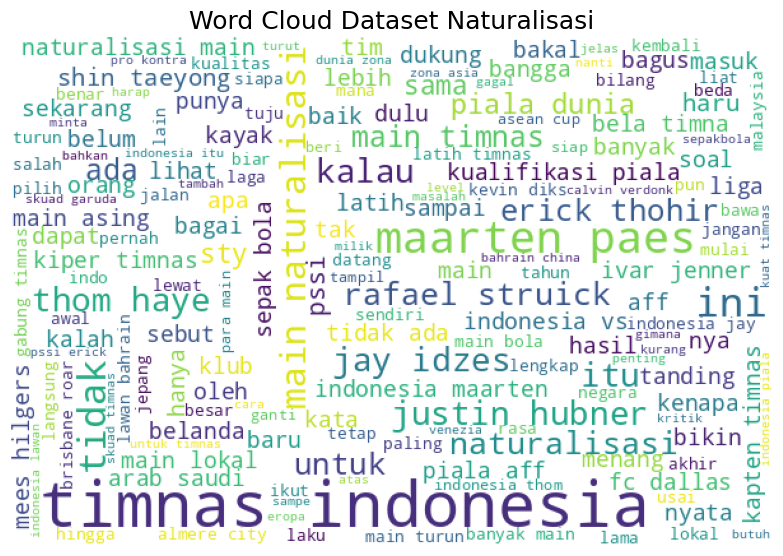

In [ ]:
# Impor WordCloud untuk visualisasi
from wordcloud import WordCloud

# Gabungkan semua kata dari kolom 'text' menjadi satu string panjang
list_words = ''
for tweet in df['text']:
    for word in tweet:
        list_words += ' ' + word

# Buat objek WordCloud dengan ukuran dan pengaturan dasar
wordcloud = WordCloud(width=600, height=400,
                      background_color='white', min_font_size=10).generate(list_words)

# Buat figure dan axis untuk menampilkan WordCloud
fig, ax = plt.subplots(figsize=(8, 6))

# Atur judul visualisasi
ax.set_title('Word Cloud Dataset Naturalisasi', fontsize=18)

# Nonaktifkan grid
ax.grid(False)

# Tampilkan word cloud di axis
ax.imshow(wordcloud)

# Atur tata letak agar pas
fig.tight_layout(pad=0)

# Sembunyikan sumbu
ax.axis('off')

# Tampilkan visualisasi
plt.show()

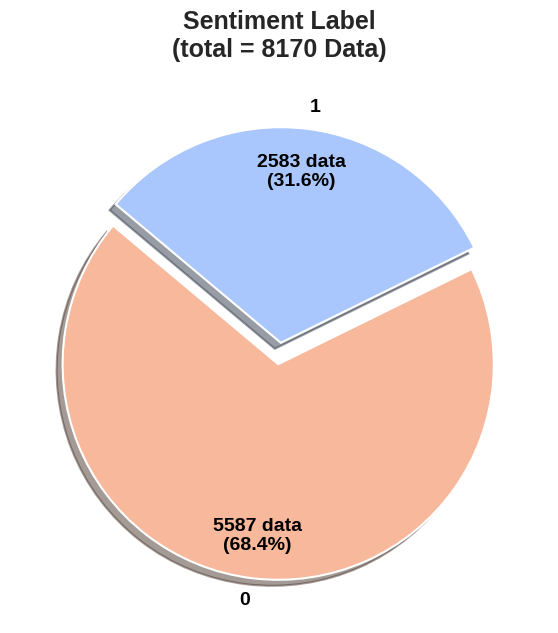

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gunakan gaya seaborn agar lebih menarik
plt.style.use("seaborn-v0_8-darkgrid")

# Pilih palet warna yang lebih smooth
colors = sns.color_palette("coolwarm_r", n_colors=2)

# Menghitung jumlah dan persentase
sizes = df['polarity'].value_counts().values
labels = df['polarity'].value_counts().index
total = sum(sizes)  # Total jumlah tweets
explode = (0.05, 0.05)  # Efek memisahkan slice sedikit

# Format label dengan jumlah dan persentase
def autopct_format(pct, all_vals):
    absolute = int(round(pct * sum(all_vals) / 100.0))  # Konversi ke jumlah asli
    return f"{absolute} data\n({pct:.1f}%)"  # Format jumlah dan persentase

# Membuat subplot lebih lebar agar proporsional
fig, ax = plt.subplots(figsize=(7, 7))

# Pie chart dengan efek lebih modern
wedges, texts, autotexts = ax.pie(
    x=sizes,
    labels=labels,
    colors=colors,
    autopct=lambda pct: autopct_format(pct, sizes),  # Format label
    explode=explode,
    textprops={'fontsize': 14, 'weight': 'bold'},  # Font lebih jelas
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},  # Outline putih agar kontras
    shadow=True,  # Efek bayangan 3D
    startangle=140,  # Sudut awal agar terlihat lebih estetik
    pctdistance=0.8  # Memindahkan persentase agar tidak menumpuk
)

# Perbaiki warna teks agar lebih sesuai dengan background
for text in texts:
    text.set_color("black")

for autotext in autotexts:
    autotext.set_color("black")  # Persentase dibuat lebih kontras

# Tambahkan judul lebih menarik
ax.set_title(f'Sentiment Label\n(total = {total} Data)', fontsize=18, pad=20, weight='bold')

# Tampilkan pie chart
plt.show()

In [ ]:
# Hitung panjang setiap tweet
df['tweet_length'] = df['stemmed_text'].astype(str).apply(len)

# Tampilkan 5 baris pertama DataFrame setelah diproses
df.head()

,full_text,clean_text,lower_text,normalized_text,stopwords_text,tokenized_text,stemmed_text,text,polarity_score,polarity,tweet_length
0,Kalo bikinin sendiri bukan dari yang ditunjuk ...,Kalo bikinin sendiri bukan dari yang ditunjuk ...,kalo bikinin sendiri bukan dari yang ditunjuk ...,kalau bikin sendiri bukan dari yang ditunjuk f...,kalau bikin sendiri ditunjuk federasi pabrikan...,"['kalau', 'bikin', 'sendiri', 'ditunjuk', 'fed...","['kalau', 'bikin', 'sendiri', 'tunjuk', 'feder...","[kalau, bikin, sendiri, tunjuk, federasi, pabr...",-7,0,188
1,MU losing streak ga ada yang peduli soalnya em...,MU losing streak ga ada yang peduli soalnya em...,mu losing streak ga ada yang peduli soalnya em...,mu losing streak tidak ada yang peduli soalnya...,losing streak tidak ada peduli soalnya klub ka...,"['losing', 'streak', 'tidak', 'ada', 'peduli',...","['losing', 'streak', 'tidak', 'ada', 'peduli',...","[losing, streak, tidak, ada, peduli, soal, klu...",-10,0,124
2,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga habis fanday langsung timnas,iya habis fanday langsung timnas,"['iya', 'habis', 'fanday', 'langsung', 'timnas']","['iya', 'habis', 'fanday', 'langsung', 'timnas']","[iya, habis, fanday, langsung, timnas]",3,1,48
3,Sebenernya Federasi dulu juga pakai vendor bua...,Sebenernya Federasi dulu juga pakai vendor bua...,sebenernya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu pakai vendor ngerjain...,"['sebenarnya', 'federasi', 'dulu', 'pakai', 'v...","['benar', 'federasi', 'dulu', 'pakai', 'vendor...","[benar, federasi, dulu, pakai, vendor, ngerjai...",-13,0,314
4,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 dan lbh bagus ini drpd punya timnas,kyunchan24 dan lebih bagus ini daripada punya ...,kyunchan24 lebih bagus ini daripada punya timnas,"['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","[kyunchan24, lebih, bagus, ini, daripada, puny...",2,1,70


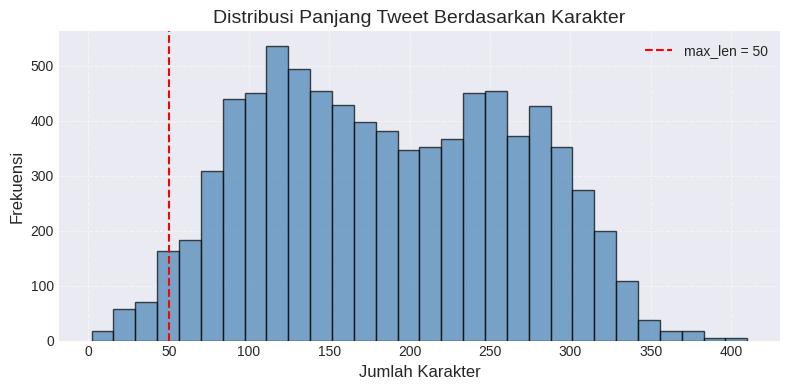

=== Statistik Panjang Tweet ===
Berdasarkan Karakter (tweet_length):
Rata-rata : 186.44
Median    : 181.0
Maksimum  : 410


In [ ]:
# Panjang berdasarkan karakter
length_karakter = df['tweet_length']

# Histogram Panjang Karakter
plt.figure(figsize=(8, 4))
plt.hist(length_karakter, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
plt.axvline(x=50, color='red', linestyle='--', linewidth=1.5, label='max_len = 50')
plt.title('Distribusi Panjang Tweet Berdasarkan Karakter', fontsize=14)
plt.xlabel('Jumlah Karakter', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Statistik Tambahan
print("=== Statistik Panjang Tweet ===")
print("Berdasarkan Karakter (tweet_length):")
print("Rata-rata :", round(length_karakter.mean(), 2))
print("Median    :", length_karakter.median())
print("Maksimum  :", length_karakter.max())

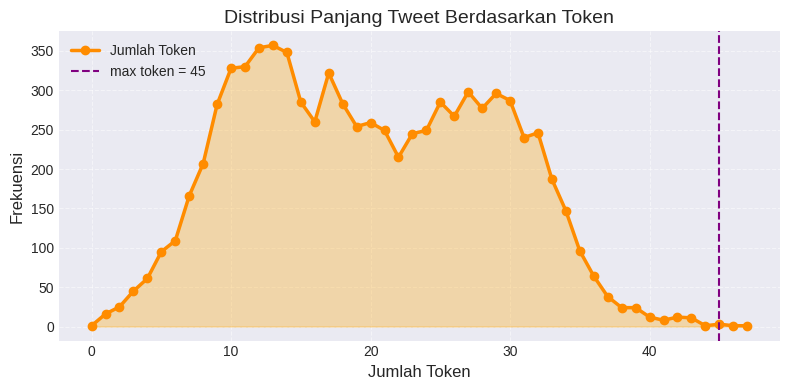

=== Statistik Panjang Tweet ===
Berdasarkan Token (stemmed):
Rata-rata : 19.91
Median    : 19.0
Maksimum  : 47


In [ ]:
# Panjang berdasarkan token
length_token = df['text'].apply(len)

# Distribusi panjang token
token_counts = length_token.value_counts().sort_index()

# Line Plot Panjang Token
plt.figure(figsize=(8, 4))
plt.plot(token_counts.index, token_counts.values, marker='o', color='darkorange', linewidth=2.5, label='Jumlah Token')
plt.fill_between(token_counts.index, token_counts.values, color='orange', alpha=0.3)
plt.axvline(x=45, color='purple', linestyle='--', linewidth=1.5, label='max token = 45')
plt.title('Distribusi Panjang Tweet Berdasarkan Token', fontsize=14)
plt.xlabel('Jumlah Token', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Statistik Tambahan
print("=== Statistik Panjang Tweet ===")
print("Berdasarkan Token (stemmed):")
print("Rata-rata :", round(length_token.mean(), 2))
print("Median    :", length_token.median())
print("Maksimum  :", length_token.max())

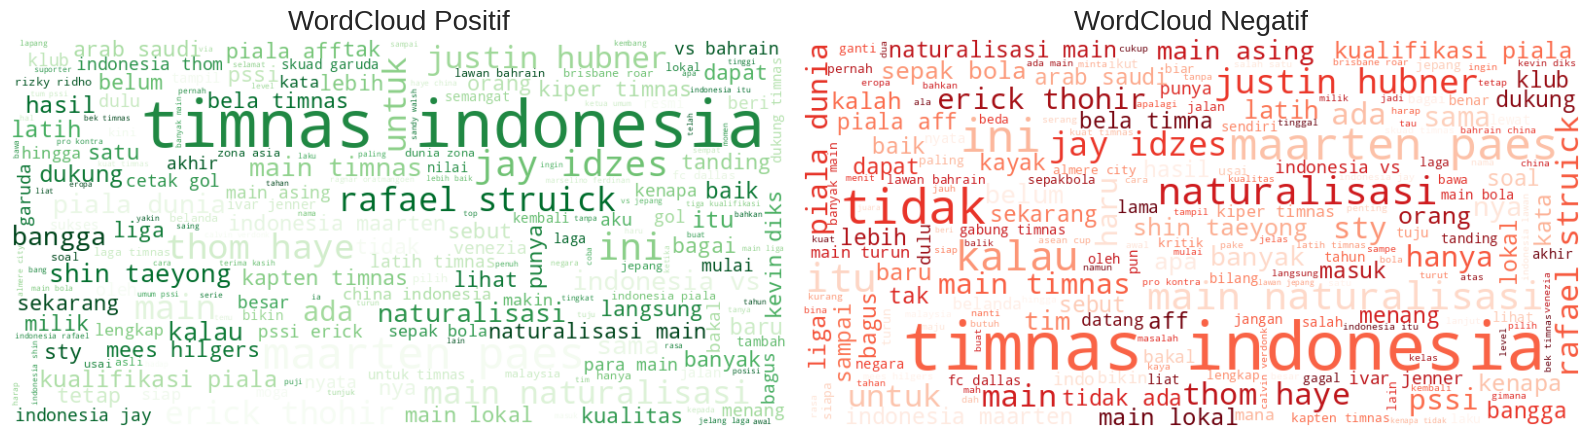

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Memisahkan data berdasarkan label
positive_data = df[df['polarity'] == 1]['stemmed_text']
negative_data = df[df['polarity'] == 0]['stemmed_text']

# Menggabungkan semua teks untuk masing-masing label menjadi satu string
positive_text = ' '.join(positive_data.dropna().apply(lambda x: ' '.join(eval(x))).tolist())
negative_text = ' '.join(negative_data.dropna().apply(lambda x: ' '.join(eval(x))).tolist())

# Membuat WordCloud untuk ulasan positif
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

# Membuat WordCloud untuk ulasan negatif
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Menampilkan WordCloud
plt.figure(figsize=(16, 8))

# WordCloud positif
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Positif', fontsize=20)

# WordCloud negatif
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Negatif', fontsize=20)

plt.tight_layout()
plt.show()

# **PREMODELING**

In [15]:
# Membaca dataset berlabel dari file CSV di Google Drive ke dalam DataFrame
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/3/labeldataset.csv')

# Menampilkan 5 baris pertama untuk melihat isi dataset
df.head(5)

,full_text,clean_text,lower_text,normalized_text,stopwords_text,tokenized_text,stemmed_text,text,polarity_score,polarity
0,Kalo bikinin sendiri bukan dari yang ditunjuk ...,Kalo bikinin sendiri bukan dari yang ditunjuk ...,kalo bikinin sendiri bukan dari yang ditunjuk ...,kalau bikin sendiri bukan dari yang ditunjuk f...,kalau bikin sendiri ditunjuk federasi pabrikan...,"['kalau', 'bikin', 'sendiri', 'ditunjuk', 'fed...","['kalau', 'bikin', 'sendiri', 'tunjuk', 'feder...","['kalau', 'bikin', 'sendiri', 'tunjuk', 'feder...",-7,0
1,MU losing streak ga ada yang peduli soalnya em...,MU losing streak ga ada yang peduli soalnya em...,mu losing streak ga ada yang peduli soalnya em...,mu losing streak tidak ada yang peduli soalnya...,losing streak tidak ada peduli soalnya klub ka...,"['losing', 'streak', 'tidak', 'ada', 'peduli',...","['losing', 'streak', 'tidak', 'ada', 'peduli',...","['losing', 'streak', 'tidak', 'ada', 'peduli',...",-10,0
2,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga habis fanday langsung timnas,iya habis fanday langsung timnas,"['iya', 'habis', 'fanday', 'langsung', 'timnas']","['iya', 'habis', 'fanday', 'langsung', 'timnas']","['iya', 'habis', 'fanday', 'langsung', 'timnas']",3,1
3,Sebenernya Federasi dulu juga pakai vendor bua...,Sebenernya Federasi dulu juga pakai vendor bua...,sebenernya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu pakai vendor ngerjain...,"['sebenarnya', 'federasi', 'dulu', 'pakai', 'v...","['benar', 'federasi', 'dulu', 'pakai', 'vendor...","['benar', 'federasi', 'dulu', 'pakai', 'vendor...",-13,0
4,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 dan lbh bagus ini drpd punya timnas,kyunchan24 dan lebih bagus ini daripada punya ...,kyunchan24 lebih bagus ini daripada punya timnas,"['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...",2,1


In [16]:
# Hapus kolom 'text' dari DataFrame secara permanen
df.drop(columns=['text'], inplace=True)

# Tampilkan 5 baris pertama untuk verifikasi kolom sudah dihapus
df.head()

,full_text,clean_text,lower_text,normalized_text,stopwords_text,tokenized_text,stemmed_text,polarity_score,polarity
0,Kalo bikinin sendiri bukan dari yang ditunjuk ...,Kalo bikinin sendiri bukan dari yang ditunjuk ...,kalo bikinin sendiri bukan dari yang ditunjuk ...,kalau bikin sendiri bukan dari yang ditunjuk f...,kalau bikin sendiri ditunjuk federasi pabrikan...,"['kalau', 'bikin', 'sendiri', 'ditunjuk', 'fed...","['kalau', 'bikin', 'sendiri', 'tunjuk', 'feder...",-7,0
1,MU losing streak ga ada yang peduli soalnya em...,MU losing streak ga ada yang peduli soalnya em...,mu losing streak ga ada yang peduli soalnya em...,mu losing streak tidak ada yang peduli soalnya...,losing streak tidak ada peduli soalnya klub ka...,"['losing', 'streak', 'tidak', 'ada', 'peduli',...","['losing', 'streak', 'tidak', 'ada', 'peduli',...",-10,0
2,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga abis fanday langsung timnas,iya jir aku juga habis fanday langsung timnas,iya habis fanday langsung timnas,"['iya', 'habis', 'fanday', 'langsung', 'timnas']","['iya', 'habis', 'fanday', 'langsung', 'timnas']",3,1
3,Sebenernya Federasi dulu juga pakai vendor bua...,Sebenernya Federasi dulu juga pakai vendor bua...,sebenernya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu juga pakai vendor bua...,sebenarnya federasi dulu pakai vendor ngerjain...,"['sebenarnya', 'federasi', 'dulu', 'pakai', 'v...","['benar', 'federasi', 'dulu', 'pakai', 'vendor...",-13,0
4,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 Dan lbh bagus ini drpd punya timnas,kyunchan24 dan lbh bagus ini drpd punya timnas,kyunchan24 dan lebih bagus ini daripada punya ...,kyunchan24 lebih bagus ini daripada punya timnas,"['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...","['kyunchan24', 'lebih', 'bagus', 'ini', 'darip...",2,1


In [17]:
import ast

# Mengubah string list di 'stemmed_text' menjadi list sebenarnya lalu gabungkan jadi kalimat string
x = df['stemmed_text'].apply(lambda x: ' '.join(ast.literal_eval(x)))

# Target label polaritas
y = df['polarity']

# Membagi data jadi train (80%) dan test (20%), dengan stratifikasi agar distribusi label tetap seimbang
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42, stratify=y
)

Distribusi Label pada Data Train:
polarity
0    4470
1    2066
Name: count, dtype: int64

Distribusi Label pada Data Test:
polarity
0    1117
1     517
Name: count, dtype: int64



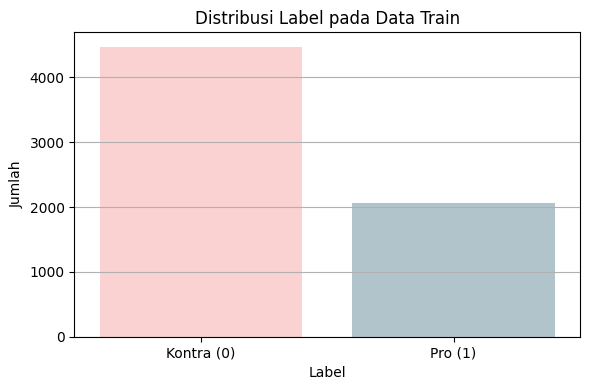

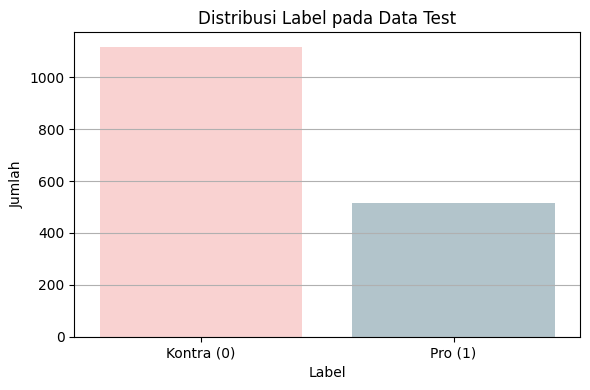

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung distribusi label
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

# Tampilkan jumlah masing-masing label
print("Distribusi Label pada Data Train:")
print(train_counts)
print("\nDistribusi Label pada Data Test:")
print(test_counts)
print()

# Warna soft khusus label
soft_colors = ['#FFCCCB', '#AEC6CF']  # 0 = merah muda, 1 = biru muda

# Plot Train
plt.figure(figsize=(6, 4))
sns.barplot(x=train_counts.index, y=train_counts.values, palette=soft_colors)
plt.title('Distribusi Label pada Data Train')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Kontra (0)', 'Pro (1)'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print()

# Plot Test
plt.figure(figsize=(6, 4))
sns.barplot(x=test_counts.index, y=test_counts.values, palette=soft_colors)
plt.title('Distribusi Label pada Data Test')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Kontra (0)', 'Pro (1)'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
# Import modul dari TensorFlow Keras untuk preprocessing teks dan pembuatan model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Membuat tokenizer dengan batasan 3000 kata terbanyak dan mengubah semua teks jadi huruf kecil
tokenizer = Tokenizer(num_words=3000, lower=True)
tokenizer.fit_on_texts(x_train)  # Pelajari kata-kata dari data latih

# Ubah teks latih dan tes menjadi urutan indeks kata (tokenisasi)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Padding sequence agar panjangnya sama, maksimal 50 kata per teks
x_train_pad = pad_sequences(x_train_seq, maxlen=50)
x_test_pad = pad_sequences(x_test_seq, maxlen=50)

In [20]:
# Contoh ambil 5 baris teks dari kolom 'stemmed_text', ubah string list ke list asli, lalu gabungkan jadi kalimat
texts = df['stemmed_text'].head(5).apply(ast.literal_eval).apply(lambda x: ' '.join(x))

# Inisialisasi tokenizer dengan maksimal 10.000 kata dan token khusus untuk kata di luar kosakata
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')

# Pelajari kosakata dari data teks contoh
tokenizer.fit_on_texts(texts)

# Ubah kalimat menjadi urutan indeks kata (tokenisasi)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences agar semua panjangnya sama (max 50), dengan padding dan truncating di akhir kalimat
max_length = 50
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Tampilkan teks asli, hasil tokenisasi, dan hasil padding tiap contoh
for i, (text, sequence, padded_sequence) in enumerate(zip(texts, sequences, padded_sequences)):
    print(f"Original Text {i+1}: {text}")
    print(f"Encoded Sequence {i+1}: {sequence}")
    print(f"Padded Sequence{i+1}: {padded_sequence}")
    print("-" * 100)

Original Text 1: kalau bikin sendiri tunjuk federasi pabrikan pernah tunjuk federasi jangan bawa bumbubumbu story masa tidak masuk beneran lucu iya
Encoded Sequence 1: [3, 13, 14, 6, 4, 15, 16, 6, 4, 17, 18, 19, 20, 21, 7, 22, 23, 24, 8]
Padded Sequence1: [ 3 13 14  6  4 15 16  6  4 17 18 19 20 21  7 22 23 24  8  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
----------------------------------------------------------------------------------------------------
Original Text 2: losing streak tidak ada peduli soal klub kalah selisih gol minus jago timnas indo
Encoded Sequence 2: [25, 26, 7, 27, 28, 29, 30, 31, 32, 33, 34, 35, 2, 36]
Padded Sequence2: [25 26  7 27 28 29 30 31 32 33 34 35  2 36  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
----------------------------------------------------------------------------------------------------
Original Text 3: iya habis fanday langsung

In [ ]:
# Import Library
from tensorflow.keras.layers import Embedding

embedding_dim = 100
max_len = 50
max_words = 10000

# Dapatkan output embedding dari 5 contoh teks
embedding_output = embedding_model.predict(padded_sequences)

# Tampilkan hasil embedding numerik
for i, (text, padded, embedding) in enumerate(zip(texts, padded_sequences, embedding_output)):
    print(f"\nTeks Asli {i+1}: {text}")
    print(f"Encoding (padded): {padded}")
    print(f"Embedding Output {i+1} (shape: {embedding.shape}):")
    print(embedding)  # Berbentuk array (50, 100): 50 token, 100 dimensi
    print("=" * 100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Teks Asli 1: kalau bikin sendiri tunjuk federasi pabrikan pernah tunjuk federasi jangan bawa bumbubumbu story masa tidak masuk beneran lucu iya
Encoding (padded): [ 3 13 14  6  4 15 16  6  4 17 18 19 20 21  7 22 23 24  8  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
Embedding Output 1 (shape: (50, 100)):
[[-0.00228048 -0.01028879 -0.01567069 ... -0.01115476  0.04234931
   0.00741827]
 [-0.04781461  0.03420139  0.01813494 ...  0.01929662 -0.04063257
  -0.00548349]
 [-0.0204728   0.0274755  -0.03110347 ... -0.00915851  0.03583052
  -0.0316986 ]
 ...
 [-0.03640009 -0.0257789  -0.02710753 ... -0.00652166  0.04930099
  -0.01458983]
 [-0.03640009 -0.0257789  -0.02710753 ... -0.00652166  0.04930099
  -0.01458983]
 [-0.03640009 -0.0257789  -0.02710753 ... -0.00652166  0.04930099
  -0.01458983]]

Teks Asli 2: losing streak tidak ada peduli soal klub kalah selisih gol minus jago timnas indo
Encoding (padded)

# **MODELING** (optimizer Adam)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 50, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,377 (4.26 MB)

 Trainable params: 1,117,377 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.6618 - loss: 0.6909 - val_accuracy: 0.8525 - val_loss: 0.3559
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.8390 - loss: 0.4023 - val_accuracy: 0.8152 - val_loss: 0.4136
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.9073 - loss: 0.2414 - val_accuracy: 0.8592 - val_loss: 0.3739
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.9513 - loss: 0.1535 - val_accuracy: 0.8929 - val_loss: 0.3303
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.9580 - loss: 0.1413 - val_accuracy: 0.8745 - val_loss: 0.4146
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.9729 - loss: 0.1080 - val_accuracy: 0.8923 - val_loss: 0.4148
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9737 - loss: 0.1038 - val_accuracy: 0.9039 - val_loss: 0.3640
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.9817 - loss: 0.0829 - 

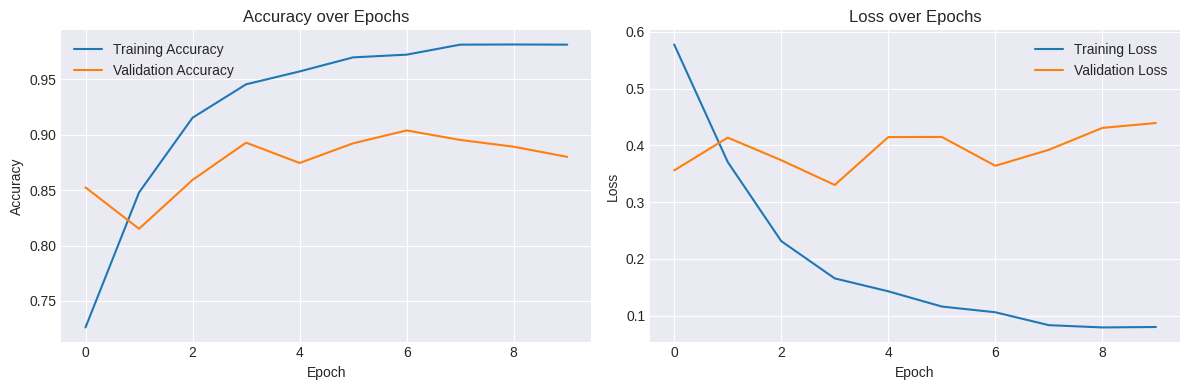

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Parameter
embedding_dim = 100
max_len = 50
max_words = 10000

# Input dan Embedding
inputs = Input(shape=(max_len,))
embedding = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len)(inputs)

# LSTM + Dropout
lstm = LSTM(128, return_sequences=False, kernel_regularizer=regularizers.l2(0.001))(embedding)
dropout = Dropout(0.5)(lstm)

# Output Layer
output = Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))(dropout)

# Model
model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy']) # Adam
model.summary()

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, mode='max', verbose=1)

# Class weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Training
history = model.fit(
    x_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_pad, y_test),
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Evaluasi
loss, accuracy = model.evaluate(x_test_pad, y_test)
print(f' : {loss}, Accuracy: {accuracy}')

# Visualisasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Test Loss: 0.3640
Test Accuracy: 0.9039
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1117
           1       0.85      0.85      0.85       517

    accuracy                           0.90      1634
   macro avg       0.89      0.89      0.89      1634
weighted avg       0.90      0.90      0.90      1634



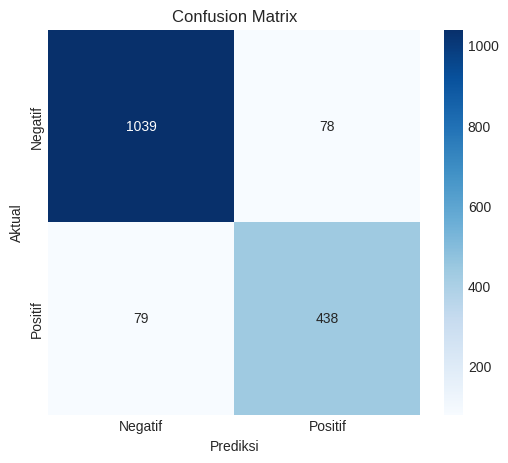

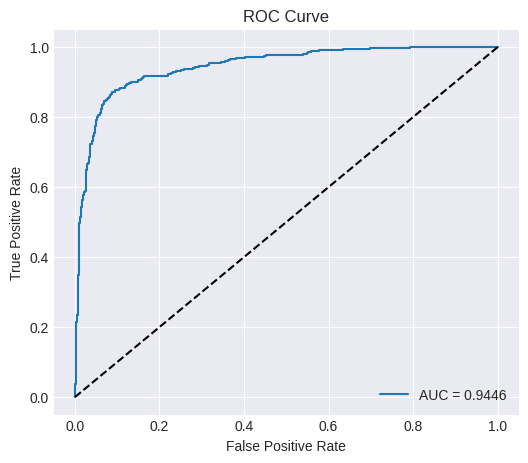

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Evaluasi Loss dan Akurasi
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Prediksi Probabilitas dan Kelas
y_pred_probs = model.predict(x_test_pad)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()
print()

# ROC Curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # garis random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **MODELING** (optimizer Adamw)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 50, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,377 (4.26 MB)

 Trainable params: 1,117,377 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.6656 - loss: 0.6953 - val_accuracy: 0.7748 - val_loss: 0.4715
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.8684 - loss: 0.3304 - val_accuracy: 0.8586 - val_loss: 0.3553
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.9115 - loss: 0.2410 - val_accuracy: 0.8800 - val_loss: 0.3350
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.9434 - loss: 0.1805 - val_accuracy: 0.8696 - val_loss: 0.3714
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.9664 - loss: 0.1248 - val_accuracy: 0.8831 - val_loss: 0.3551
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.9715 - loss: 0.1150 - val_accuracy: 0.8929 - val_loss: 0.3685
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.9805 - loss: 0.0883 - val_accuracy: 0.8917 - val_loss: 0.3526
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.9761 - loss: 0.1000 - 

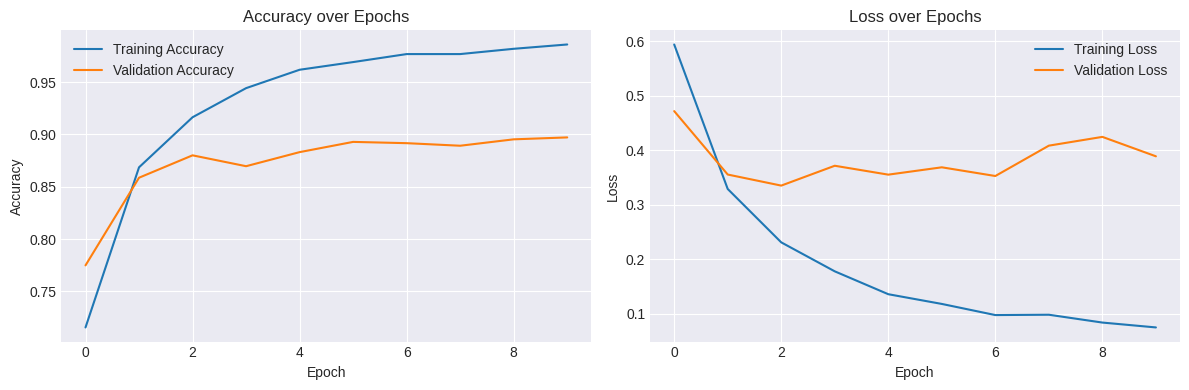

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Parameter
embedding_dim = 100
max_len = 50
max_words = 10000

# Input dan Embedding
inputs = Input(shape=(max_len,))
embedding = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len)(inputs)

# LSTM + Dropout
lstm = LSTM(128, return_sequences=False, kernel_regularizer=regularizers.l2(0.001))(embedding)
dropout = Dropout(0.5)(lstm)

# Output Layer
output = Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))(dropout)

# Model
model = Model(inputs=inputs, outputs=output)

# Gunakan AdamW Optimizer
optimizer = AdamW(learning_rate=0.001, weight_decay=1e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, mode='max', verbose=1)

# Class weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Training
history = model.fit(
    x_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_pad, y_test),
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Evaluasi
loss, accuracy = model.evaluate(x_test_pad, y_test)
print(f'Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Visualisasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Test Loss: 0.3887
Test Accuracy: 0.8972
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1117
           1       0.86      0.81      0.83       517

    accuracy                           0.90      1634
   macro avg       0.89      0.87      0.88      1634
weighted avg       0.90      0.90      0.90      1634



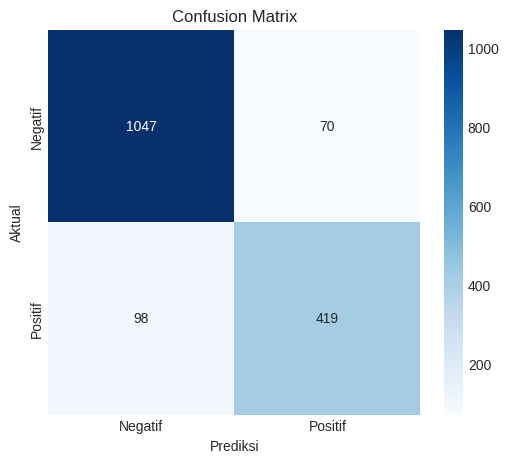

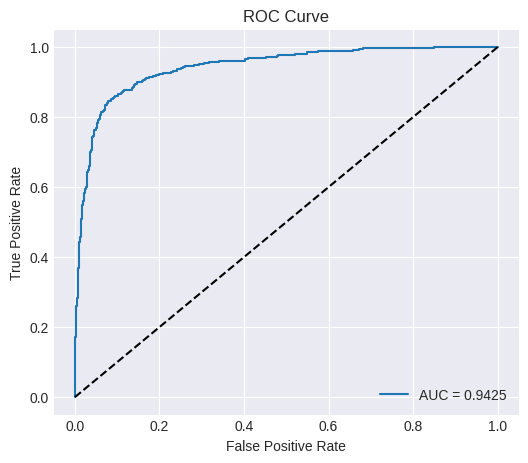

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Evaluasi Loss dan Akurasi
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Prediksi Probabilitas dan Kelas
y_pred_probs = model.predict(x_test_pad)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()
print()

# ROC Curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # garis random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **MODELING** (optimizer RMSprop)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 50, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,377 (4.26 MB)

 Trainable params: 1,117,377 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - accuracy: 0.6369 - loss: 0.7431 - val_accuracy: 0.7515 - val_loss: 0.5090
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.8249 - loss: 0.4326 - val_accuracy: 0.8121 - val_loss: 0.4118
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.8808 - loss: 0.3109 - val_accuracy: 0.8599 - val_loss: 0.3496
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.9058 - loss: 0.2585 - val_accuracy: 0.8635 - val_loss: 0.3688
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.9286 - loss: 0.2206 - val_accuracy: 0.8886 - val_loss: 0.3155
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - accuracy: 0.9387 - loss: 0.1921 - val_accuracy: 0.8446 - val_loss: 0.4256
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.9421 - loss: 0.1750 - val_accuracy: 0.8905 - val_loss: 0.3149
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.9505 - loss: 0.1590 -

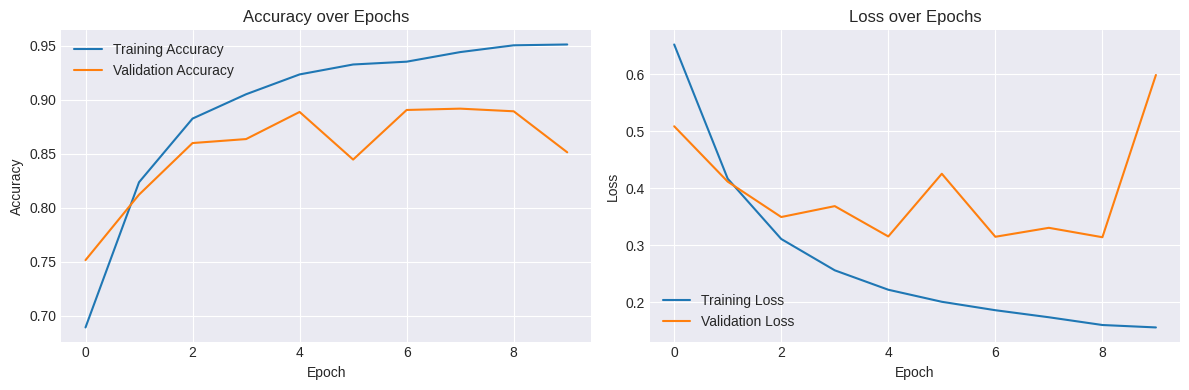

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Parameter
embedding_dim = 100
max_len = 50
max_words = 10000

# Input dan Embedding
inputs = Input(shape=(max_len,))
embedding = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len)(inputs)

# LSTM + Dropout
lstm = LSTM(128, return_sequences=False, kernel_regularizer=regularizers.l2(0.001))(embedding)
dropout = Dropout(0.5)(lstm)

# Output Layer
output = Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))(dropout)

# Model
model = Model(inputs=inputs, outputs=output)

# Gunakan RMSprop Optimizer
optimizer = RMSprop(learning_rate=0.001) # RMSprop
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, mode='max', verbose=1)

# Class weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Training
history = model.fit(
    x_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_pad, y_test),
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Evaluasi
loss, accuracy = model.evaluate(x_test_pad, y_test)
print(f'Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Visualisasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Test Loss: 0.3307
Test Accuracy: 0.8917
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1117
           1       0.83      0.83      0.83       517

    accuracy                           0.89      1634
   macro avg       0.88      0.87      0.87      1634
weighted avg       0.89      0.89      0.89      1634



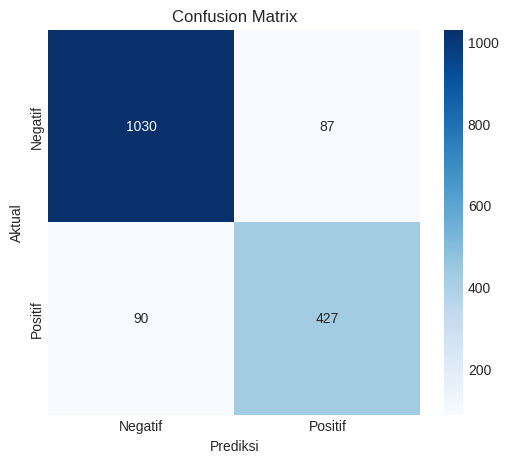

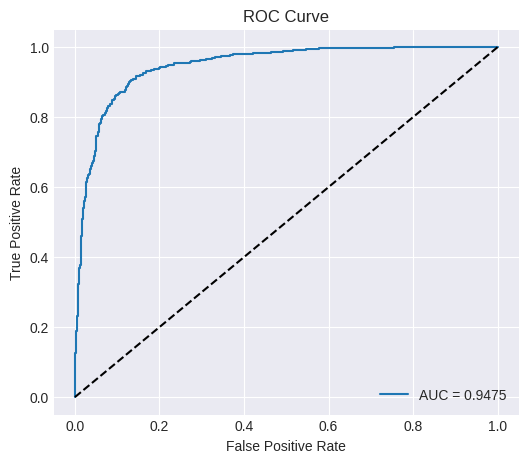

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Evaluasi Loss dan Akurasi
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Prediksi Probabilitas dan Kelas
y_pred_probs = model.predict(x_test_pad)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()
print()

# ROC Curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # garis random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **MODELING** (optimizer Nadam)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, 50, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,377 (4.26 MB)

 Trainable params: 1,117,377 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.5713 - loss: 0.7067 - val_accuracy: 0.8360 - val_loss: 0.3955
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.8721 - loss: 0.3269 - val_accuracy: 0.8770 - val_loss: 0.3330
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.9342 - loss: 0.2180 - val_accuracy: 0.8862 - val_loss: 0.3362
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.9502 - loss: 0.1572 - val_accuracy: 0.8892 - val_loss: 0.3356
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.9699 - loss: 0.1215 - val_accuracy: 0.8923 - val_loss: 0.3478
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.9764 - loss: 0.0988 - val_accuracy: 0.8978 - val_loss: 0.3761
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9778 - loss: 0.0892 - val_accuracy: 0.8739 - val_loss: 0.3963
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.9793 - loss: 0.0867 - 

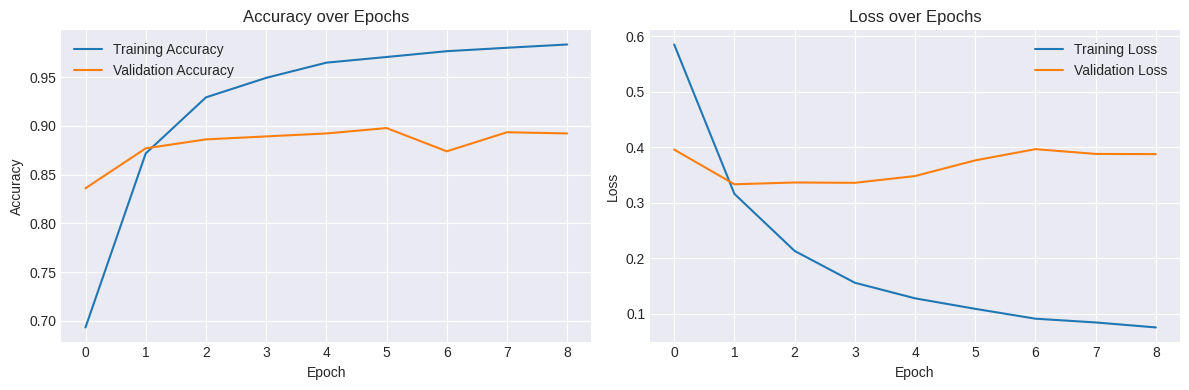

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Parameter
embedding_dim = 100
max_len = 50
max_words = 10000

# Input dan Embedding
inputs = Input(shape=(max_len,))
embedding = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len)(inputs)

# LSTM + Dropout
lstm = LSTM(128, return_sequences=False, kernel_regularizer=regularizers.l2(0.001))(embedding)
dropout = Dropout(0.5)(lstm)

# Output Layer
output = Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001))(dropout)

# Model
model = Model(inputs=inputs, outputs=output)

# Gunakan Nadam Optimizer
optimizer = Nadam(learning_rate=0.001)  # Nadam
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, mode='max', verbose=1)

# Class weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Training
history = model.fit(
    x_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_pad, y_test),
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Evaluasi
loss, accuracy = model.evaluate(x_test_pad, y_test)
print(f'Test Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Visualisasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Test Loss: 0.3761
Test Accuracy: 0.8978
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1117
           1       0.85      0.83      0.84       517

    accuracy                           0.90      1634
   macro avg       0.88      0.88      0.88      1634
weighted avg       0.90      0.90      0.90      1634



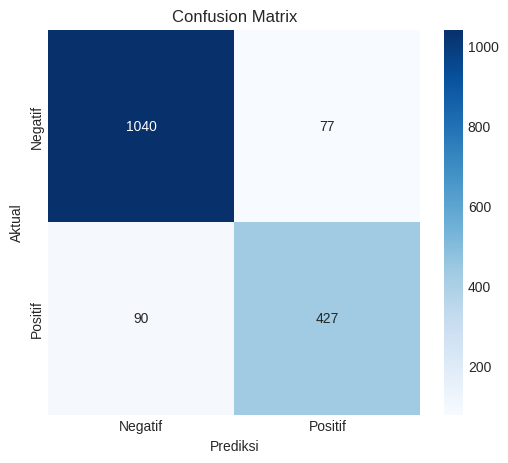

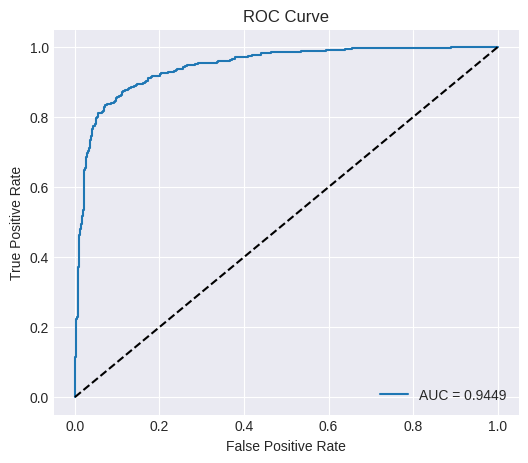

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Evaluasi Loss dan Akurasi
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Prediksi Probabilitas dan Kelas
y_pred_probs = model.predict(x_test_pad)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()
print()

# ROC Curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # garis random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()